## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
# Read in the CSV as a DataFrame


bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HE
bitstamp_df = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HEREb
bitstamp_df.dtypes
bitstamp_df.head()
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")
bitstamp_df


/var/folders/8_/m4hvzw7s2g5g2hkh5nlr3x900000gn/T/ipykernel_1441/1587995485.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")
/var/folders/8_/m4hvzw7s2g5g2hkh5nlr3x900000gn/T/ipykernel_1441/1587995485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")
bitstamp_df.dtypes

/var/folders/8_/m4hvzw7s2g5g2hkh5nlr3x900000gn/T/ipykernel_1441/873251037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HEREbi
bitstamp_df_no_dup = bitstamp_df.drop_duplicates()
bitstamp_df_no_dup

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [11]:
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [12]:
coinbase_df = coinbase.dropna()

In [13]:
coinbase_df.dtypes
coinbase_df.head()
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")
coinbase_df

/var/folders/8_/m4hvzw7s2g5g2hkh5nlr3x900000gn/T/ipykernel_1441/3231681309.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")
/var/folders/8_/m4hvzw7s2g5g2hkh5nlr3x900000gn/T/ipykernel_1441/3231681309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [14]:
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")
coinbase_df.dtypes


/var/folders/8_/m4hvzw7s2g5g2hkh5nlr3x900000gn/T/ipykernel_1441/1824635884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [15]:
coinbase_df_no_dup = coinbase_df.drop_duplicates()
coinbase_df_no_dup.head(5)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df_no_dup.iloc[:, 3]
bitstamp_sliced.columns = ["Close"] 
bitstamp_sliced.head()

# Review the first five rows of the DataFrame
# YOUR CODE HERE

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [17]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df_no_dup.iloc[:, 3]
coinbase_sliced.columns = ["Close"] 
coinbase_sliced.head()
# Review the first five rows of the DataFrame
# YOUR CODE HERE

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [18]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [19]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

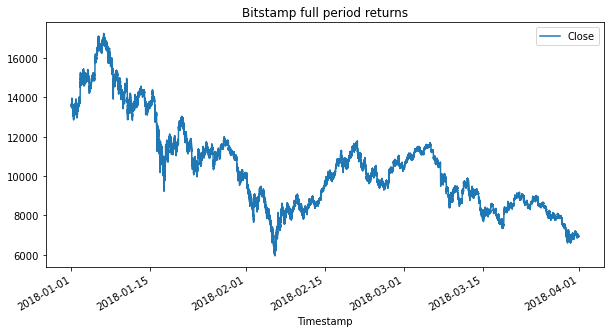

In [20]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
ax = bitstamp_sliced.plot(
    legend="True",
    figsize=(10,5),
    title="Bitstamp full period returns")


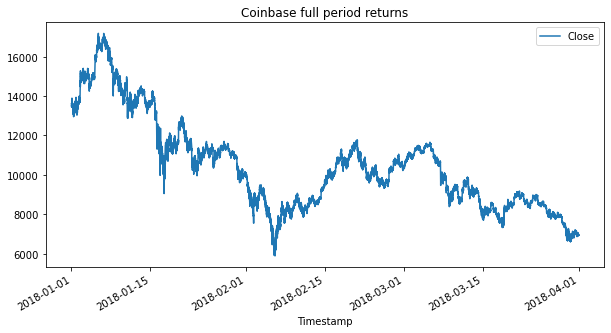

In [21]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
ax= coinbase_sliced.plot(
    legend="True",
    figsize=(10,5),
    title="Coinbase full period returns")

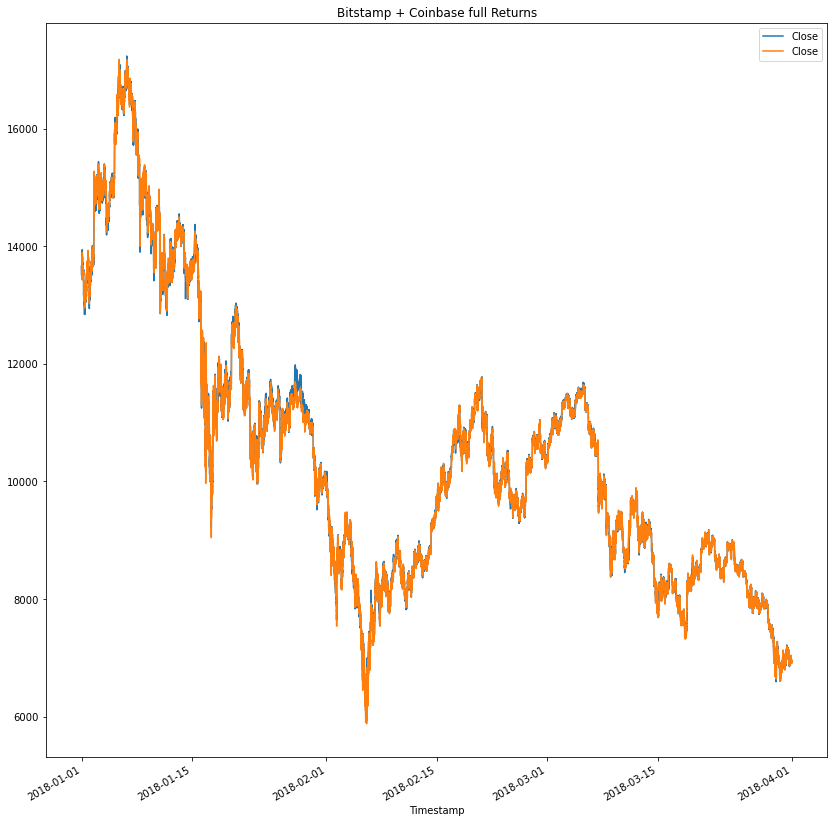

In [22]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
merged = pd.concat([bitstamp_sliced, coinbase_sliced], axis=1)
ax= merged.plot(
    legend="True",
    figsize=(14,15),
    title="Bitstamp + Coinbase full Returns")

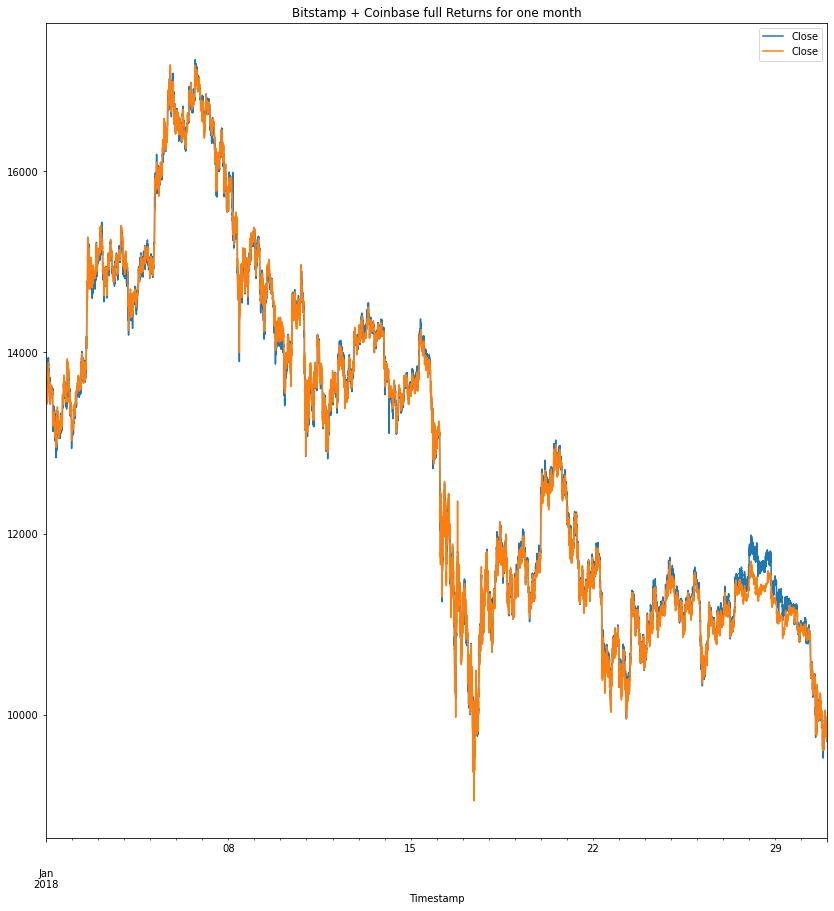

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
merged = pd.concat([bitstamp_sliced, coinbase_sliced], axis=1)
merged_sliced= merged.iloc[0:((60*24*31)+1-1440), 0:2]
merged_sliced.head((60*24*31)+1-1440)
ax= merged_sliced.plot(
    legend="True",
    figsize=(14,15),
    title="Bitstamp + Coinbase full Returns for one month")


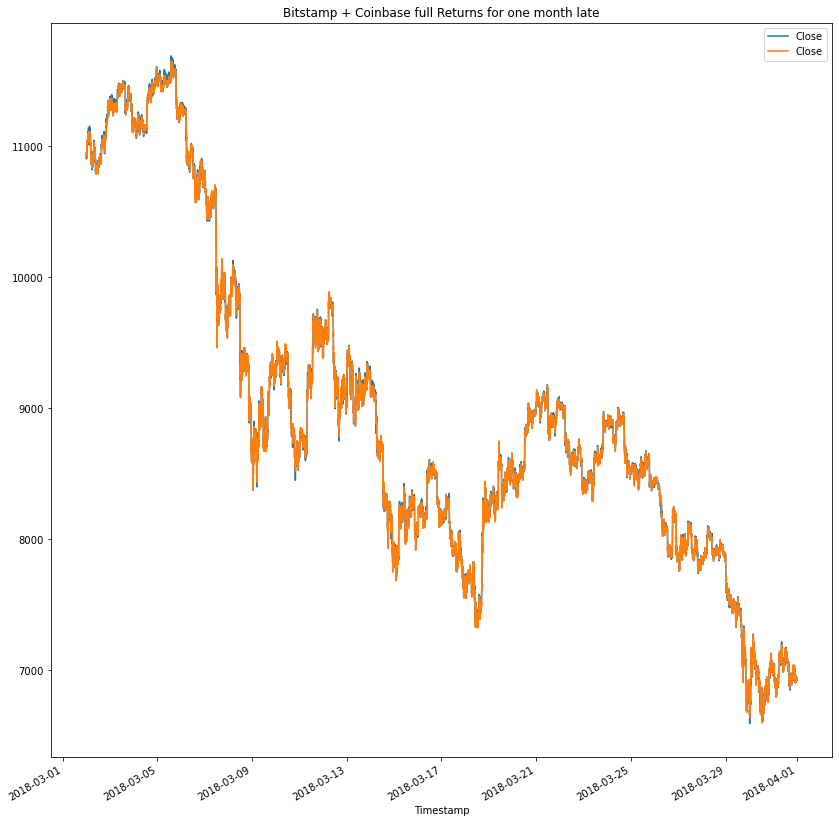

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
merged = pd.concat([bitstamp_sliced, coinbase_sliced], axis=1)
merged_sliced2= merged.iloc[(((60*24*31)+1-1440)*2):(((60*24*31)+1-1440)*3), 0:2]
ax= merged_sliced2.plot(
    legend="True",
    figsize=(14,15),
    title="Bitstamp + Coinbase full Returns for one month late")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

In [25]:
#Yes the previous spread was 7000 for the month vs only 4000 later

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [26]:
merged = pd.concat([bitstamp_sliced, coinbase_sliced], axis=1)
merged_sliced_early = merged.loc['2018-1-24': '2018-01-30']
merged_sliced_early.describe()

,Close,Close
count,10027.000000,10080.000000
mean,11135.996828,11057.824919
std,448.462272,389.747997
min,9519.010000,9602.010000
25%,10979.665000,10945.385000
50%,11194.190000,11125.000000
75%,11431.820000,11323.990000
max,11982.000000,11694.980000


<AxesSubplot:>

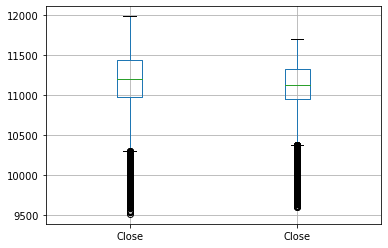

In [27]:

merged_sliced_early.boxplot()

In [28]:
merged_sliced_middle = merged.loc['2018-2-15': '2018-03-01']
merged_sliced_middle.describe()

,Close,Close
count,21544.000000,21599.000000
mean,10417.604063,10409.910997
std,543.759849,542.607296
min,9290.080000,9325.000000
25%,9964.485000,9959.870000
50%,10448.800000,10435.010000
75%,10776.345000,10770.010000
max,11779.990000,11770.000000


<AxesSubplot:>

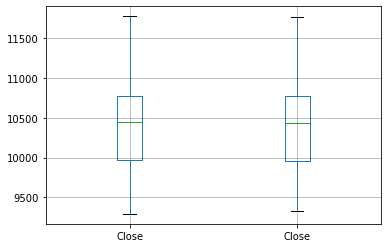

In [29]:


merged_sliced_middle.boxplot()

In [30]:
merged_sliced_late = merged.loc['2018-3-10': '2018-03-20']
merged_sliced_late.describe()

,Close,Close
count,15677.000000,15780.000000
mean,8612.732429,8608.136078
std,580.648995,581.991699
min,7335.000000,7326.000000
25%,8196.740000,8187.990000
50%,8525.580000,8520.475000
75%,9130.000000,9119.990000
max,9888.000000,9887.750000


<AxesSubplot:>

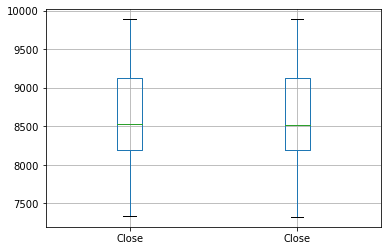

In [31]:

merged_sliced_late.boxplot()

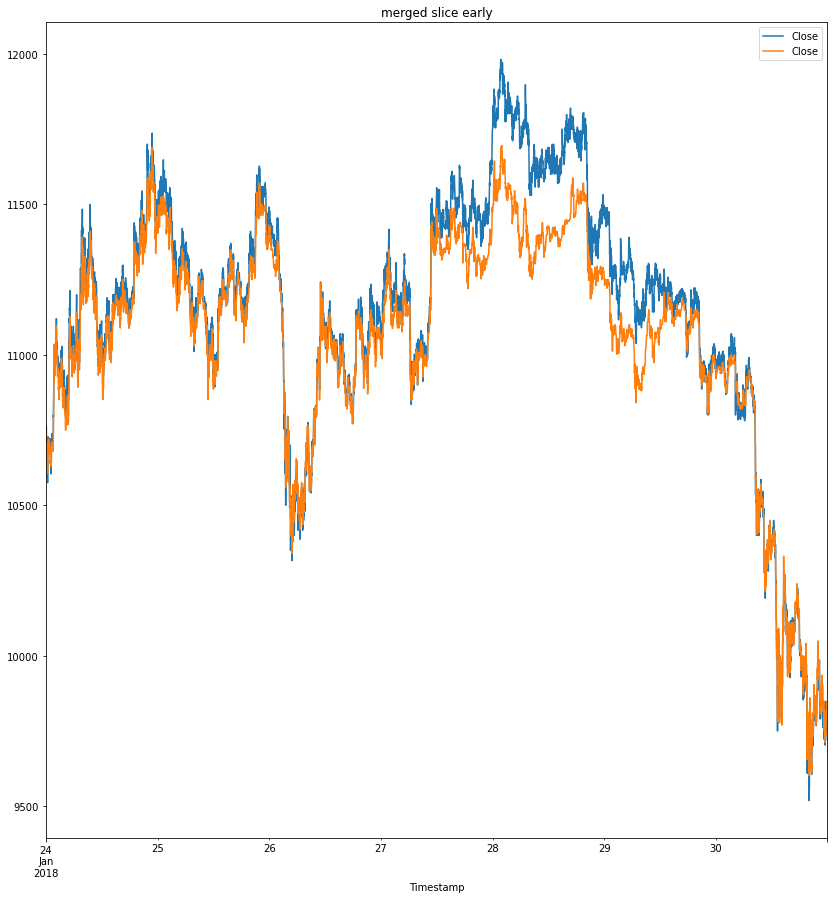

In [32]:
ax= merged_sliced_early.plot(
    legend="True",
    figsize=(14,15),
    title="merged slice early")

#### Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
merged = pd.concat([bitstamp_sliced, coinbase_sliced], axis=1)
merged_sliced_1= merged.loc(2018-01-24-00:00:00:

In [33]:

    # Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = merged_sliced_early.iloc[:, 0] - merged_sliced_early.iloc[:, 1]
arbitrage_spread_early.describe()

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE

count    10027.000000
mean        78.757108
std         93.156631
min       -146.620000
25%         17.065000
50%         46.750000
75%        113.550000
max        439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'spread early'}>

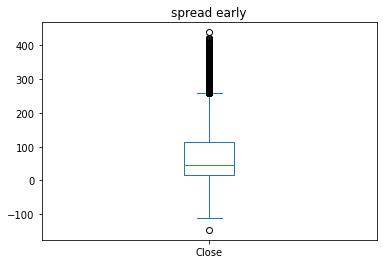

In [34]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind= 'box', title= 'spread early')


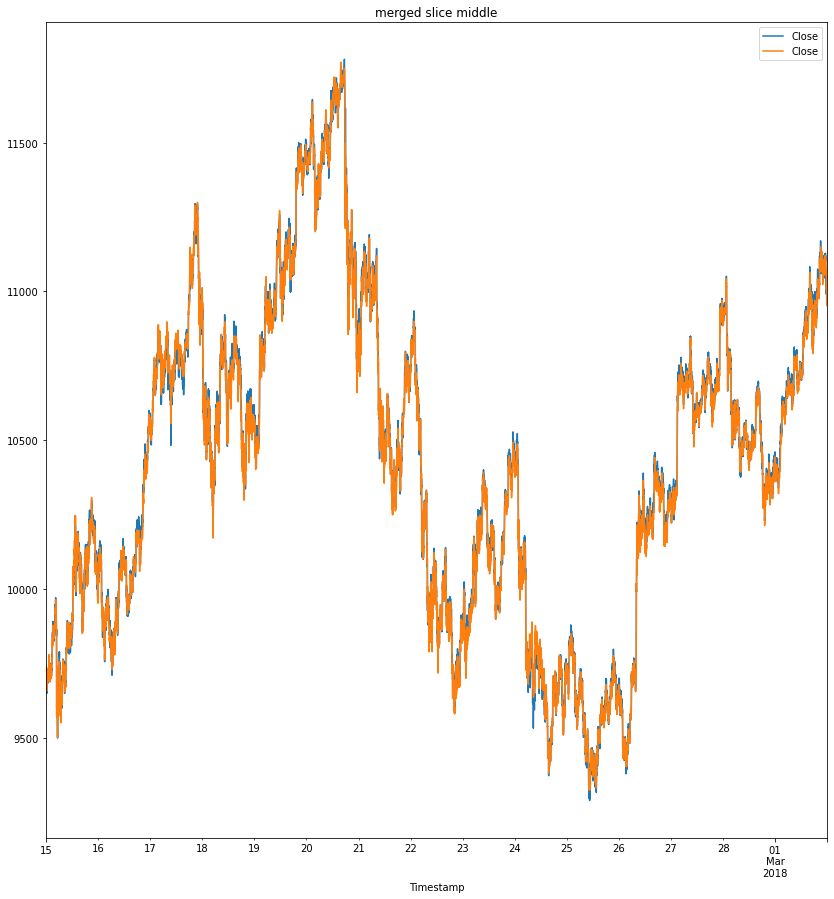

In [35]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
ax= merged_sliced_middle.plot(
    legend="True",
    figsize=(14,15),
    title="merged slice middle")

In [36]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = merged_sliced_middle.iloc[:, 0] - merged_sliced_middle.iloc[:, 1]
arbitrage_spread_middle.describe()

# Generate summary statistics 
# YOUR CODE HERE

count    21543.000000
mean         7.742944
std         17.159039
min       -121.320000
25%         -1.830000
50%          8.790000
75%         18.815000
max        254.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'spread middle'}>

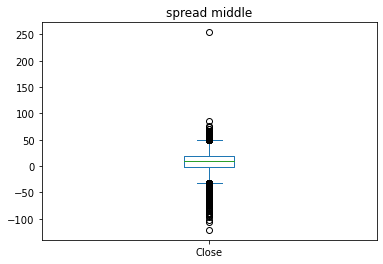

In [37]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind= 'box', title= 'spread middle')

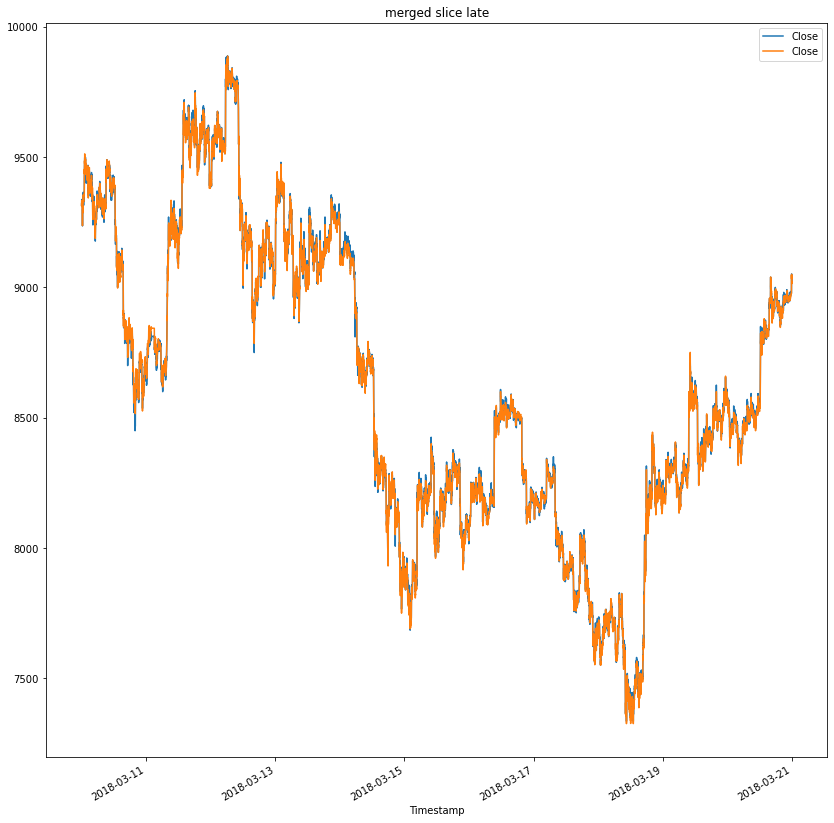

In [38]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
ax= merged_sliced_late.plot(
    legend="True",
    figsize=(14,15),
    title="merged slice late")

In [39]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = merged_sliced_late.iloc[:, 0] - merged_sliced_late.iloc[:, 1]
arbitrage_spread_late.describe()


# Generate summary statistics for the late DataFrame
# YOUR CODE HERE

count    15677.000000
mean         4.224214
std         12.970308
min        -93.180000
25%         -3.310000
50%          4.490000
75%         12.180000
max        147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'spread late'}>

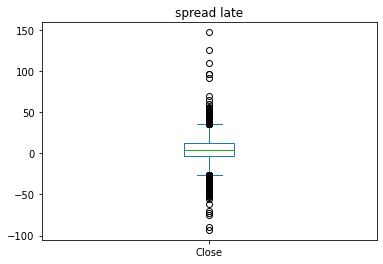

In [40]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind= 'box', title= 'spread late')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [41]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = merged_sliced_early.iloc[:, 0] - merged_sliced_early.iloc[:, 1]
arbitrage_spread_early.describe()

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
#if arbitrage_spread_early.mean() >= 0:
    #print(arbitrage_spread_early.describe())

arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    8660.000000
mean       94.207842
std        90.857627
min         0.010000
25%        29.680000
50%        55.010000
75%       145.997500
max       439.010000
Name: Close, dtype: float64

In [54]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = merged_sliced_middle.iloc[:, 0] - merged_sliced_middle.iloc[:, 1]
arbitrage_spread_middle.describe()

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
#if arbitrage_spread_early.mean() >= 0:
    #print(arbitrage_spread_early.describe())

arbitrage_spread_middle[arbitrage_spread_middle > 0].describe().dropna()

count    15321.000000
mean        15.890140
std         11.050701
min          0.010000
25%          7.390000
50%         14.250000
75%         22.390000
max        254.000000
Name: Close, dtype: float64

In [53]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = merged_sliced_late.iloc[:, 0] - merged_sliced_late.iloc[:, 1]
arbitrage_spread_late.describe()

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
#if arbitrage_spread_early.mean() >= 0:
    #print(arbitrage_spread_early.describe())

arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    10157.000000
mean        11.363205
std          8.670793
min          0.010000
25%          4.940000
50%          9.860000
75%         16.000000
max        147.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [55]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_returns = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_df['Close'].loc['2018-01-24':'2018-01-30']

spread_returns.dropna().head()


    

Timestamp
2018-01-24 00:01:00    0.000645
2018-01-24 00:02:00    0.001101
2018-01-24 00:03:00    0.000728
2018-01-24 00:07:00    0.000290
2018-01-24 00:09:00    0.002300
Name: Close, dtype: float64

In [56]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_returnsm = arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase_df['Close'].loc['2018-2-15': '2018-03-01']

spread_returnsm.dropna().head()

Timestamp
2018-02-15 00:06:00    0.000310
2018-02-15 00:07:00    0.001088
2018-02-15 00:08:00    0.001632
2018-02-15 00:09:00    0.000858
2018-02-15 00:10:00    0.000207
Name: Close, dtype: float64

In [57]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_returnsl = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_df['Close'].loc['2018-3-10': '2018-03-20']

spread_returnsl.dropna().head()

Timestamp
2018-03-10 00:01:00    0.000739
2018-03-10 00:02:00    0.001715
2018-03-10 00:03:00    0.001206
2018-03-10 00:04:00    0.000399
2018-03-10 00:05:00    0.000401
Name: Close, dtype: float64

Timestamp
2018-01-24 00:01:00    0.000645
2018-01-24 00:02:00    0.001101
2018-01-24 00:03:00    0.000728
2018-01-24 00:07:00    0.000290
2018-01-24 00:09:00    0.002300
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [65]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = sum(spread_returns > .01)

profitable_trades_early

2512

In [75]:

# Review the first five profitable trades
# YOUR CODE HERE


profitable_trades_early = spread_returns[spread_returns > .01]
profitable_trades_early.head(5)

Timestamp
2018-01-24 04:58:00    0.010101
2018-01-24 07:38:00    0.010334
2018-01-24 20:29:00    0.010150
2018-01-24 21:44:00    0.011482
2018-01-24 21:46:00    0.011689
Name: Close, dtype: float64

In [66]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = sum(spread_returnsm > .01)

profitable_trades_middle

1

In [76]:
profitable_trades_middle = spread_returnsm[spread_returnsm > .01]
profitable_trades_middle.head(5)

Timestamp
2018-02-20 17:57:00    0.022357
Name: Close, dtype: float64

In [69]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = sum(spread_returnsl > .01)

profitable_trades_late

6

In [77]:
profitable_trades_late = spread_returnsl[spread_returnsl > .01]
profitable_trades_late.head(5)

Timestamp
2018-03-11 13:47:00    0.010203
2018-03-12 05:31:00    0.011352
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [ ]:
#the first date has the most opportunity for profit

In [80]:
profitable_trades_early.describe()

count    2512.000000
mean        0.019525
std         0.005574
min         0.010006
25%         0.015233
50%         0.019419
75%         0.022937
max         0.038510
Name: Close, dtype: float64

In [79]:
profitable_trades_middle.describe()

count    1.000000
mean     0.022357
std           NaN
min      0.022357
25%      0.022357
50%      0.022357
75%      0.022357
max      0.022357
Name: Close, dtype: float64

In [78]:
profitable_trades_late.describe()

count    6.000000
mean     0.013106
std      0.003114
min      0.010203
25%      0.011310
50%      0.011677
75%      0.014632
max      0.018276
Name: Close, dtype: float64

In [45]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early = spread_returns[spread_returns > .01]
profitable_trades_early.describe()

count    2512.000000
mean        0.019525
std         0.005574
min         0.010006
25%         0.015233
50%         0.019419
75%         0.022937
max         0.038510
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [95]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_df['Close'].loc['2018-01-24':'2018-01-30']

# Drop any missing values from the profit DataFrame
#profit_per_trade_early = # YOUR CODE HERE

profit_early.dropna()
# View the early profit DataFrame
# YOUR CODE HERE


Timestamp
2018-01-24 04:58:00    111.00
2018-01-24 07:38:00    116.75
2018-01-24 20:29:00    115.70
2018-01-24 21:44:00    132.73
2018-01-24 21:46:00    135.18
                        ...  
2018-01-29 12:24:00    116.54
2018-01-29 12:31:00    128.44
2018-01-29 12:33:00    121.93
2018-01-29 12:37:00    111.42
2018-01-29 12:39:00    112.75
Name: Close, Length: 2512, dtype: float64

In [96]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_df['Close'].loc['2018-2-15': '2018-03-01']

# Drop any missing values from the profit DataFrame
#profit_per_trade_early = # YOUR CODE HERE
profit_middle.dropna()
# View the early profit DataFrame
# YOUR CODE HERE


Timestamp
2018-02-20 17:57:00    254.0
Name: Close, dtype: float64

In [97]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_df['Close'].loc['2018-3-10': '2018-03-20']

# Drop any missing values from the profit DataFrame
#profit_per_trade_early = # YOUR CODE HERE
profit_late.dropna()
# View the early profit DataFrame
# YOUR CODE HERE



Timestamp
2018-03-11 13:47:00     96.92
2018-03-12 05:31:00    110.00
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

Timestamp
2018-01-24 04:58:00    111.00
2018-01-24 07:38:00    116.75
2018-01-24 20:29:00    115.70
2018-01-24 21:44:00    132.73
2018-01-24 21:46:00    135.18
                        ...  
2018-01-29 12:24:00    116.54
2018-01-29 12:31:00    128.44
2018-01-29 12:33:00    121.93
2018-01-29 12:37:00    111.42
2018-01-29 12:39:00    112.75
Name: Close, Length: 2512, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [89]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_early.dropna().describe()

count    2512.000000
mean      221.117201
std        64.462752
min       110.680000
25%       170.842500
50%       218.600000
75%       260.900000
max       439.010000
Name: Close, dtype: float64

In [90]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_middle.dropna().describe()

count      1.0
mean     254.0
std        NaN
min      254.0
25%      254.0
50%      254.0
75%      254.0
max      254.0
Name: Close, dtype: float64

In [91]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_late.dropna().describe()

count      6.000000
mean     111.551667
std       21.493070
min       91.890000
25%       96.995000
50%      103.610000
75%      121.722500
max      147.650000
Name: Close, dtype: float64

count    2512.000000
mean      221.117201
std        64.462752
min       110.680000
25%       170.842500
50%       218.600000
75%       260.900000
max       439.010000
Name: Close, dtype: float64

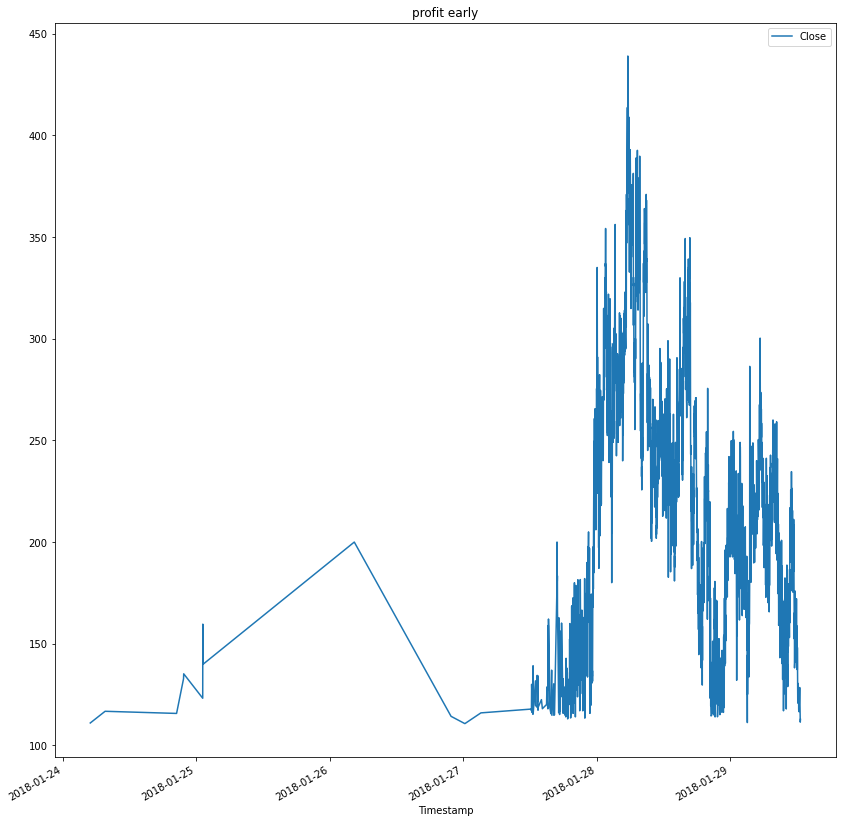

In [48]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_early = profit_early.dropna()
ax= profit_early.plot(
    legend="True",
    figsize=(14,15),
    title="profit early")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [94]:
sum(profit_early.dropna())


555446.4099999978

In [98]:
sum(profit_middle.dropna())

254.0

In [93]:
sum(profit_late.dropna())

669.3099999999977

In [49]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE


555446.4099999978

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
cumulative_profit_early = profit_early.dropna().cumsum()

In [100]:
cumulative_profit_early

Timestamp
2018-01-24 04:58:00       111.00
2018-01-24 07:38:00       227.75
2018-01-24 20:29:00       343.45
2018-01-24 21:44:00       476.18
2018-01-24 21:46:00       611.36
                         ...    
2018-01-29 12:24:00    554971.87
2018-01-29 12:31:00    555100.31
2018-01-29 12:33:00    555222.24
2018-01-29 12:37:00    555333.66
2018-01-29 12:39:00    555446.41
Name: Close, Length: 2512, dtype: float64

In [99]:
cumulative_profit_middle = profit_middle.dropna().cumsum()

In [101]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_middle

Timestamp
2018-02-20 17:57:00    254.0
Name: Close, dtype: float64

In [103]:
cumulative_profit_late = profit_late.dropna().cumsum()

In [104]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_late

Timestamp
2018-03-11 13:47:00     96.92
2018-03-12 05:31:00    206.92
2018-03-14 20:31:00    298.81
2018-03-14 20:32:00    424.44
2018-03-14 20:33:00    572.09
2018-03-14 20:34:00    669.31
Name: Close, dtype: float64

In [ ]:
#when there is more spread between the different exchanges there is more profit

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE

you make more money